In [1]:
from os import listdir
from os.path import isfile, join
import os
import re
import pandas
import matplotlib.pyplot as plt
import numpy as np
import multiprocessing
onlyfiles = [f for f in listdir(os.getcwd()) if isfile(join(os.getcwd(), f))]

In [2]:
def reader_fos(fileName):
    df = pandas.read_json(fileName, lines=True)
    fos_authors_and_year = df[["id", "title", "year", "authors", "fos", "references"]]
    return fos_authors_and_year

In [3]:
dblp_part_regex = re.compile("author_indexed_fos*")
part_files_filter_obj = filter(lambda file_name: dblp_part_regex.match(file_name), onlyfiles)
part_files = list(part_files_filter_obj)

In [4]:
list_of_dataframes = list(map(reader_fos, part_files))
df = pandas.concat(list_of_dataframes, ignore_index=True)

In [37]:
filtered_years = df.loc[df["year"] > 2013]
filtered_years = filtered_years.loc[df["year"] < 2018]
filtered_years

,id,title,year,authors,fos,references
5,1965664720,A low power wireless sensor node with vibratio...,2014.0,"[{'index': 2247601}, {'index': 1264008}, {'ind...","[{'name': '104', 'w': 0.0}, {'name': '649', 'w...","[1510600213, 2170239483]"
6,1965664774,Shortest Paths Based Web Service Selection in ...,2014.0,"[{'index': 2247603}, {'index': 2247604}]","[{'name': '2716', 'w': 0.5306294}, {'name': '2...","[1479916289, 1560267311, 2002838096, 200757299..."
20,1965666279,Implementing Linguistic Landscape investigatio...,2014.0,[{'index': 2247613}],"[{'name': '6531', 'w': 0.532050133}, {'name': ...",[1972366573]
21,1965666524,Video object segmentation with shape cue based...,2014.0,"[{'index': 125253}, {'index': 18704}, {'index'...","[{'name': '128', 'w': 0.44799903}, {'name': '1...","[1496571393, 1518641734, 1555385401, 197586267..."
24,1965666690,Simple passive valves for addressable pneumati...,2014.0,"[{'index': 98512}, {'index': 2247616}, {'index...","[{'name': '4', 'w': 0.3417303}, {'name': '5027...","[2003653926, 2124540383, 2137560758]"
...,...,...,...,...,...,...
4074399,2026772789,Joint optimization over sensing time and power...,2014.0,"[{'index': 875433}, {'index': 875434}, {'index...","[{'name': '3938', 'w': 0.4178568}, {'name': '3...","[2003022495, 2065321019, 2069292411, 207972966..."
4074403,2026773017,Top-N Recommendation with Missing Implicit Fee...,2015.0,"[{'index': 875435}, {'index': 39414}, {'index'...","[{'name': '1300', 'w': 0.439114928}, {'name': ...","[1992665562, 1999956270, 2020631728, 204574560..."
4074408,2026774140,Clock-controlled generators with large period ...,2014.0,[{'index': 875445}],"[{'name': '9734', 'w': 0.67059}, {'name': '4',...","[111312581, 1572199847, 1584542188, 1755066991..."
4074418,2026775156,THE DOMINATION NUMBER OF STRONG PRODUCT OF DIR...,2014.0,"[{'index': 875454}, {'index': 875455}, {'index...","[{'name': '4370', 'w': 0.505299747}, {'name': ...","[1963704255, 1993642211, 1994365837, 202378287..."


In [39]:
len(filtered_years)

1068923

In [40]:
def get_authors_ids(references_list):
    authors = []
    if not isinstance(references_list, list) and pandas.isna(references_list):
        return []
    for reference_id in references_list:
        reference_authors = list(df.loc[df["id"] == int(reference_id)]["authors"])
        if len(reference_authors):
            authors.extend(list(map(lambda x: x["index"], reference_authors[0])))
    return list(set(authors))

In [41]:
classes = pandas.read_csv("classes_fos.csv", index_col=0)
agent_systems_class = classes.loc[classes["modularity_class"] == 20]

In [42]:
agent_systems_class["Id"].values

array([1048,  499, 1287, 1756, 1180])

In [43]:
def common_member(list_a, list_b):
    a_set = set(list_a)
    b_set = set(list_b)
    return len(a_set & b_set) > 0

In [44]:
filtered_with_wages = filtered_years.loc[filtered_years["fos"].apply(lambda x: type(x) is not float)]
filtered_with_wages

,id,title,year,authors,fos,references
5,1965664720,A low power wireless sensor node with vibratio...,2014.0,"[{'index': 2247601}, {'index': 1264008}, {'ind...","[{'name': '104', 'w': 0.0}, {'name': '649', 'w...","[1510600213, 2170239483]"
6,1965664774,Shortest Paths Based Web Service Selection in ...,2014.0,"[{'index': 2247603}, {'index': 2247604}]","[{'name': '2716', 'w': 0.5306294}, {'name': '2...","[1479916289, 1560267311, 2002838096, 200757299..."
20,1965666279,Implementing Linguistic Landscape investigatio...,2014.0,[{'index': 2247613}],"[{'name': '6531', 'w': 0.532050133}, {'name': ...",[1972366573]
21,1965666524,Video object segmentation with shape cue based...,2014.0,"[{'index': 125253}, {'index': 18704}, {'index'...","[{'name': '128', 'w': 0.44799903}, {'name': '1...","[1496571393, 1518641734, 1555385401, 197586267..."
24,1965666690,Simple passive valves for addressable pneumati...,2014.0,"[{'index': 98512}, {'index': 2247616}, {'index...","[{'name': '4', 'w': 0.3417303}, {'name': '5027...","[2003653926, 2124540383, 2137560758]"
...,...,...,...,...,...,...
4074399,2026772789,Joint optimization over sensing time and power...,2014.0,"[{'index': 875433}, {'index': 875434}, {'index...","[{'name': '3938', 'w': 0.4178568}, {'name': '3...","[2003022495, 2065321019, 2069292411, 207972966..."
4074403,2026773017,Top-N Recommendation with Missing Implicit Fee...,2015.0,"[{'index': 875435}, {'index': 39414}, {'index'...","[{'name': '1300', 'w': 0.439114928}, {'name': ...","[1992665562, 1999956270, 2020631728, 204574560..."
4074408,2026774140,Clock-controlled generators with large period ...,2014.0,[{'index': 875445}],"[{'name': '9734', 'w': 0.67059}, {'name': '4',...","[111312581, 1572199847, 1584542188, 1755066991..."
4074418,2026775156,THE DOMINATION NUMBER OF STRONG PRODUCT OF DIR...,2014.0,"[{'index': 875454}, {'index': 875455}, {'index...","[{'name': '4370', 'w': 0.505299747}, {'name': ...","[1963704255, 1993642211, 1994365837, 202378287..."


In [45]:
filtered_slice = filtered_years

In [46]:
filtered_slice["fos"] = filtered_with_wages["fos"].apply(lambda row: [int(field["name"]) for field in row])

In [47]:
filtered_slice = filtered_slice.loc[filtered_slice["fos"].apply(lambda foses: common_member(foses, agent_systems_class["Id"].values))]

In [48]:
len(filtered_slice)

6140

In [49]:
filtered_slice["author_references"] = filtered_slice["references"].apply(get_authors_ids)

/Users/bartek/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [50]:
filtered_slice

,id,title,year,authors,fos,references,author_references
447,1965709183,Second-order group consensus for multi-agent s...,2015.0,"[{'index': 2247908}, {'index': 2247908}, {'ind...","[165, 6972, 42, 233, 499, 932, 935, 47]","[1966811233, 1974954027, 1985131825, 198543133...","[1666310, 2496519, 193670, 193671, 126346, 224..."
2289,1965895579,Developing pervasive multi-agent systems with ...,2015.0,"[{'index': 30244}, {'index': 119883}, {'index'...","[440, 832, 4, 9272, 499, 833, 98, 1040, 3119, ...","[177169120, 198779116, 1458724087, 1487384767,...","[337409, 262660, 262661, 214540, 17422, 218640..."
2324,1965899411,Distributed tracking control of second-order m...,2014.0,"[{'index': 2249312}, {'index': 2249312}, {'ind...","[233, 499, 934, 47, 651]","[1981685742, 1982439975, 2007403280, 202665649...","[27013, 849158, 193670, 888710, 50568, 193671,..."
2707,1965939249,Consensus tracking of linear multi-agent syste...,2014.0,"[{'index': 2249570}, {'index': 269792}, {'inde...","[1851, 2967, 233, 47, 543, 499, 98, 484]","[1904869745, 1973963158, 1977418125, 198465187...","[823040, 3971, 40710, 193671, 267655, 2496519,..."
4343,1966107190,A situation-aware system for the detection of ...,2014.0,"[{'index': 25561}, {'index': 378331}, {'index'...","[104, 28092, 132, 13562, 1048, 36868, 6919, 4]","[130306558, 1655636376, 1974588631, 1979504468...","[35848, 122248, 118672, 87443, 169620, 55321, ..."
...,...,...,...,...,...,...,...
4070876,2026434208,Continuum evolution of multi agent systems und...,2014.0,"[{'index': 111395}, {'index': 850862}]","[233, 849, 90, 3486, 392, 4, 1141, 499, 96]","[1482619501, 2041951223, 2070224219, 210801176...","[111395, 1203015, 866440, 850862, 50254, 13029..."
4071408,2026485182,Passing a Hide-and-Seek Third-Person Turing Test,2014.0,"[{'index': 871808}, {'index': 169007}, {'index...","[27, 13019, 132, 4, 1287, 499, 286, 104]","[96574868, 1867465928, 1968909098, 1969483458,...","[871808, 871809, 3424003, 993286, 69650, 13003..."
4071469,2026489587,Sliding mode control for multi-agent systems u...,2016.0,"[{'index': 871882}, {'index': 871883}, {'index...","[7099, 233, 42, 931, 590, 1090, 47, 499, 396, ...","[1982617281, 1988372689, 2012562254, 204431900...","[3414152, 22410, 22412, 995349, 22174, 998816,..."
4073184,2026654865,Algorithmic Renormalization for Network Dynamics,2015.0,[{'index': 249078}],"[110, 91, 42, 15541, 729, 543, 88, 499, 11926,...","[1756760847, 1910515323, 1997672043, 202142992...","[27012, 27013, 76937, 849933, 25234, 124564, 7..."


In [51]:
from networkx.algorithms.community.kclique import k_clique_communities

In [52]:
citation_dict = {}
def fill_graph(row, graph):
    authors = list(row["authors"])
    references_authors = list(row["author_references"])
    for author in list(authors):
        for refrence_author in references_authors:
            edge_name = str(author["index"]) + "_" + str(refrence_author)
            weight = graph.get(edge_name, 0)
            graph[edge_name] = weight + 1
            
filtered_slice.apply(lambda row: fill_graph(row, citation_dict), axis=1)

447        None
2289       None
2324       None
2707       None
4343       None
           ... 
4070876    None
4071408    None
4071469    None
4073184    None
4073662    None
Length: 6140, dtype: object

In [53]:
import networkx
citation_graph = networkx.DiGraph()
for edge in citation_dict.keys():
    nodes = edge.split("_")
    node_x = int(nodes[0])
    node_y = int(nodes[1])
    weight = int(citation_dict[edge])
    citation_graph.add_edge(node_x, node_y, weight = weight)
citation_graph

In [54]:
citation_graph.number_of_edges()

625317

In [154]:
networkx.write_gexf(citation_graph,"citation_graph_for_agent_systems.gexf")

In [55]:
def are_bidirectional_neighbors(a, b, g):
    return a in g.neighbors(b)

In [103]:
def get_bidirectional_nodes(graph):
    bidirectional_nodes = {}
    for element, adjacency in graph.adjacency():
        b_neighbors = set(map(lambda x: x[0], list(adjacency.items())))
        for neighbor in b_neighbors:
            if are_bidirectional_neighbors(element, neighbor, graph):
                element_bidirectional_neighbours = bidirectional_nodes.get(element, [])
                element_bidirectional_neighbours.append(neighbor)
                bidirectional_nodes[element] = element_bidirectional_neighbours
    return bidirectional_nodes
bidirectional_nodes = get_bidirectional_nodes(citation_graph)

In [104]:
sorted_bidirectional_nodes = [(k,v) for k, v in sorted(bidirectional_nodes.items(), key=lambda item: len(item[1]), reverse=True)]

In [105]:
len(sorted_bidirectional_nodes)

5345

In [59]:
top_bidirectional_nodes = []
for element, bidirectional_neighbors in sorted_bidirectional_nodes[:20]:
    top_bidirectional_nodes.append((element, len(bidirectional_neighbors)))

In [27]:
def get_author_name(row, graph):
    authors = list(row["authors"])
    references_authors = list(row["author_references"])
    for author in list(authors):
        for refrence_author in references_authors:
            edge_name = str(author["index"]) + "_" + str(refrence_author)
            weight = graph.get(edge_name, 0)
            graph[edge_name] = weight + 1
            
df["authors"].apply(lambda authors: fill_graph(row, citation_dict), axis=1)

TypeError: <lambda>() got an unexpected keyword argument 'axis'

In [60]:
import json
authors_index_to_id = {}
with open('authors_index_to_id.json') as json_file:
    authors_index_to_id = json.load(json_file)

In [61]:
authors_id_name_map = {}
with open('authors_id__name_map.json') as json_file:
    authors_id_name_map = json.load(json_file)


In [62]:
for element, count in top_bidirectional_nodes:
    name = authors_id_name_map[authors_index_to_id[str(element)]]["name"]
    print("- %s - %d" % (name, count))

- Wenwu Yu - 186
- Wei Ren - 178
- Guanrong Chen - 166
- Jinde Cao - 153
- Guanghui Wen - 144
- Long Wang - 143
- Gang Feng - 123
- Lihua Xie - 116
- Frank L. Lewis - 113
- Dimos V. Dimarogonas - 93
- Huijun Gao - 92
- Yiguang Hong - 91
- Wei Xing Zheng - 89
- Qing-Long Han - 89
- Xinghuo Yu - 88
- Zidong Wang - 86
- Zhisheng Duan - 81
- Zhongkui Li - 79
- Jie Huang - 77
- Karl Henrik Johansson - 76


In [66]:
# print(len(sorted_bidirectional_nodes))

relations = 0
for i in range(0,len(sorted_bidirectional_nodes)):
    relations += len(sorted_bidirectional_nodes[i][1])
print(relations)


29457


(265369,
 [1804,
  265369,
  3108,
  485797,
  288809,
  364201,
  31038,
  8126,
  755777,
  307542,
  292830,
  89831,
  88172,
  312565,
  73848,
  3971,
  50567,
  50568,
  109448,
  51212,
  395929,
  30877,
  1060893,
  160287,
  19615,
  22176,
  98338,
  2778667,
  411564,
  4270,
  55215,
  9391,
  289585,
  289586,
  27697,
  2313907,
  130235,
  122044,
  41789,
  21060,
  37319,
  222155,
  17741,
  1268181,
  107863,
  826590,
  2225631,
  269791,
  269792,
  1419242,
  32494,
  2416503,
  126346,
  15011,
  263076,
  17708,
  24374,
  55877,
  1494089,
  19023,
  271312,
  19423,
  5120,
  12735,
  15808,
  761040,
  244565,
  1115997,
  1434975,
  88307,
  51575,
  255638,
  335129,
  924328,
  509482,
  107697,
  270271,
  270272,
  270273,
  888660,
  288599,
  8154,
  336091,
  409947,
  67951,
  33391,
  425979,
  529413,
  358288,
  505880,
  142621,
  16414,
  72997,
  795313,
  22717,
  11214,
  48338,
  681936,
  71119,
  71118,
  22412,
  193670,
  193671,
  252

In [128]:
set_of_all_birdirectional_authors = set()
for auhtor, citated_authors in sorted_bidirectional_nodes:
    for citated_author in citated_authors:
        author_id = authors_index_to_id[str(citated_author)]
        set_of_all_birdirectional_authors.add(str(citated_author))
        
len(set_of_all_birdirectional_authors)

5345

In [151]:
def is_in_bidirectional_set(row):
    set_of_row_authors =  set(map(lambda x: str(x["index"]), row["authors"]))
    return len(set_of_all_birdirectional_authors & set_of_row_authors) > 0

filtered_bidirectional_authors = filtered_slice[filtered_slice.apply(lambda x: is_in_bidirectional_set(x), axis=1)]

In [152]:
filtered_bidirectional_authors

,id,title,year,authors,fos,references,author_references
2289,1965895579,Developing pervasive multi-agent systems with ...,2015.0,"[{'index': 30244}, {'index': 119883}, {'index'...","[440, 832, 4, 9272, 499, 833, 98, 1040, 3119, ...","[177169120, 198779116, 1458724087, 1487384767,...","[337409, 262660, 262661, 214540, 17422, 218640..."
2324,1965899411,Distributed tracking control of second-order m...,2014.0,"[{'index': 2249312}, {'index': 2249312}, {'ind...","[233, 499, 934, 47, 651]","[1981685742, 1982439975, 2007403280, 202665649...","[27013, 849158, 193670, 888710, 50568, 193671,..."
2707,1965939249,Consensus tracking of linear multi-agent syste...,2014.0,"[{'index': 2249570}, {'index': 269792}, {'inde...","[1851, 2967, 233, 47, 543, 499, 98, 484]","[1904869745, 1973963158, 1977418125, 198465187...","[823040, 3971, 40710, 193671, 267655, 2496519,..."
4343,1966107190,A situation-aware system for the detection of ...,2014.0,"[{'index': 25561}, {'index': 378331}, {'index'...","[104, 28092, 132, 13562, 1048, 36868, 6919, 4]","[130306558, 1655636376, 1974588631, 1979504468...","[35848, 122248, 118672, 87443, 169620, 55321, ..."
5243,1966197446,An operational semantics for the goal life-cyc...,2014.0,"[{'index': 183629}, {'index': 484974}, {'index...","[4, 2, 103, 373, 355, 173, 1048, 3015]","[198400421, 1488758641, 1500989946, 1501700777...","[106884, 910076, 106886, 128647, 669829, 18471..."
...,...,...,...,...,...,...,...
4070876,2026434208,Continuum evolution of multi agent systems und...,2014.0,"[{'index': 111395}, {'index': 850862}]","[233, 849, 90, 3486, 392, 4, 1141, 499, 96]","[1482619501, 2041951223, 2070224219, 210801176...","[111395, 1203015, 866440, 850862, 50254, 13029..."
4071408,2026485182,Passing a Hide-and-Seek Third-Person Turing Test,2014.0,"[{'index': 871808}, {'index': 169007}, {'index...","[27, 13019, 132, 4, 1287, 499, 286, 104]","[96574868, 1867465928, 1968909098, 1969483458,...","[871808, 871809, 3424003, 993286, 69650, 13003..."
4071469,2026489587,Sliding mode control for multi-agent systems u...,2016.0,"[{'index': 871882}, {'index': 871883}, {'index...","[7099, 233, 42, 931, 590, 1090, 47, 499, 396, ...","[1982617281, 1988372689, 2012562254, 204431900...","[3414152, 22410, 22412, 995349, 22174, 998816,..."
4073184,2026654865,Algorithmic Renormalization for Network Dynamics,2015.0,[{'index': 249078}],"[110, 91, 42, 15541, 729, 543, 88, 499, 11926,...","[1756760847, 1910515323, 1997672043, 202142992...","[27012, 27013, 76937, 849933, 25234, 124564, 7..."


In [161]:
def are_self_citated(row):
    paper_id = row["id"]
    references_list = row["references"]
    
    if not isinstance(references_list, list) and pandas.isna(references_list):
        return False
    if pandas.isna(paper_id):
        return False

    for reference_id in references_list:
        references_of_reference = list(df.loc[df["id"] == int(reference_id)]["references"])
        if paper_id in references_of_reference:
            return True
    return False

In [162]:
filtered_bidirectional_authors[filtered_bidirectional_authors.apply(lambda x: are_self_citated(x),axis=1)]

,id,title,year,authors,fos,references,author_references


In [210]:
def create_graph(citation_dict):
    citation_graph = networkx.DiGraph()
    for edge in citation_dict.keys():
        nodes = edge.split("_")
        node_x = int(nodes[0])
        node_y = int(nodes[1])
        weight = int(citation_dict[edge])
        citation_graph.add_edge(node_x, node_y, weight = weight)
    return citation_graph

def get_bidirectional_graph_for_year(year):
    publications_filtered_by_year = filtered_bidirectional_authors.loc[filtered_bidirectional_authors["year"].astype(int) == year]
    publications_filtered_by_year = publications_filtered_by_year[publications_filtered_by_year.apply(lambda x: filter_refrences(x), axis=1)]
    
    citation_dict = {}
    publications_filtered_by_year.apply(lambda row: fill_graph(row, citation_dict), axis=1)
    return create_graph(citation_dict)

In [211]:
def filter_refrences(row):
    references_list = row["references"]
    if not isinstance(references_list, list) and pandas.isna(references_list):
        return False
    if len(references_list) < 5:
        return True
    return False

In [212]:
len(get_bidirectional_graph_for_year(2014))

1004

In [213]:
len(get_bidirectional_graph_for_year(2017))

628

In [216]:
graph_up_to_current_year = networkx.Graph()
edges_up_to_previous_year = []
import matplotlib.pyplot as plt
%matplotlib inline

amount_of_top_elements_per_year = 20

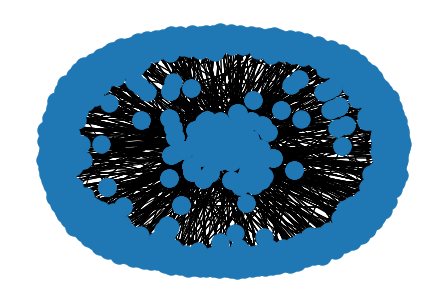

In [218]:
current_year_graph = get_bidirectional_graph_for_year(2015)
filtered_current_year_graph = current_year_graph.copy()

edges_to_draw = edges_up_to_previous_year + list(filtered_current_year_graph.edges)
edges_up_to_previous_year = edges_to_draw

networkx.draw_spring(filtered_current_year_graph, edgelist=edges_to_draw)

In [234]:
def get_top_bidiriectional_nodes(graph, n):
    bidirectional_nodes = get_bidirectional_nodes(graph)
    sorted_bidirectional_nodes = [(k,v) for k, v in sorted(bidirectional_nodes.items(), key=lambda item: len(item[1]), reverse=True)]
    top_bidirectional_nodes = []
    for element, bidirectional_neighbors in sorted_bidirectional_nodes[:n]:
        top_bidirectional_nodes.append((element, bidirectional_neighbors))
    return dict(top_bidirectional_nodes)

In [246]:
citation_dict = get_top_bidiriectional_nodes(get_bidirectional_graph_for_year(2014), 50)

In [247]:
def create_filtered_graph(top_nodes):
    citation_dict = {}
    for author in top_nodes.keys():
        for reference_author in top_nodes[author]:
            edge_name = str(author) + "_" + str(reference_author)
            weight = citation_dict.get(edge_name, 0)
            citation_dict[edge_name] = weight + 1
            
    citation_graph = networkx.DiGraph()
    for edge in citation_dict.keys():
        nodes = edge.split("_")
        node_x = int(nodes[0])
        node_y = int(nodes[1])
        weight = int(citation_dict[edge])
        citation_graph.add_edge(node_x, node_y, weight = weight)
    return citation_graph

In [269]:
def combine_top_nodes(dict1, dict2):
    new_dict = {}
    if len(dict1.keys()) == 0:
        return dict2
    if len(dict2.keys()) == 0:
        return dict1
    
    for author in dict2.keys():
        if dict1.get(author, None) == None:
            new_dict[author] = dict2[author]
        else:
            new_dict[author] = dict1[author] + dict2[author]
    return new_dict

Text(0.5, 1.0, 'Dynamics of transforming top bidirectional citation group, 2014')

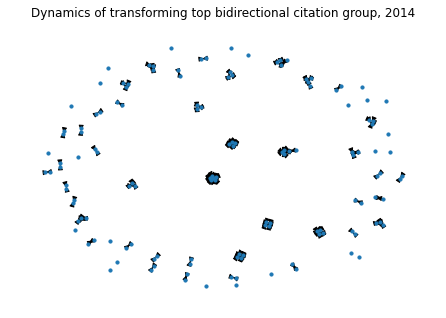

In [295]:
n = 1000
all_nodes = {}

current_year_nodes = get_top_bidiriectional_nodes(get_bidirectional_graph_for_year(2014), n)
nodes_to_show = combine_top_nodes(all_nodes, current_year_nodes)
graph = create_filtered_graph(nodes_to_show)
networkx.draw_spring(graph, edgelist=graph.edges, node_size=10)
all_nodes = nodes_to_show

plt.title("Dynamics of transforming top bidirectional citation group, 2014")

Text(0.5, 1.0, 'Dynamics of transforming top bidirectional citation group, 2015')

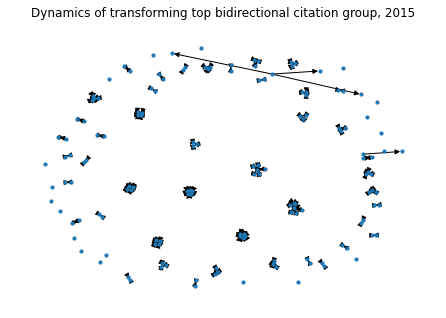

In [296]:
current_year_nodes = get_top_bidiriectional_nodes(get_bidirectional_graph_for_year(2015), n)
nodes_to_show = combine_top_nodes(all_nodes, current_year_nodes)
graph = create_filtered_graph(nodes_to_show)
networkx.draw_spring(graph, edgelist=graph.edges, node_size=10)
all_nodes = nodes_to_show
plt.title("Dynamics of transforming top bidirectional citation group, 2015")

Text(0.5, 1.0, 'Dynamics of transforming top bidirectional citation group, 2016')

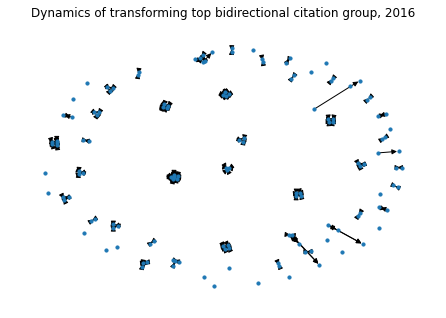

In [297]:
current_year_nodes = get_top_bidiriectional_nodes(get_bidirectional_graph_for_year(2016), n)
nodes_to_show = combine_top_nodes(all_nodes, current_year_nodes)
graph = create_filtered_graph(nodes_to_show)
networkx.draw_spring(graph, edgelist=graph.edges, node_size=10)
all_nodes = nodes_to_show

plt.title("Dynamics of transforming top bidirectional citation group, 2016")

Text(0.5, 1.0, 'Dynamics of transforming top bidirectional citation group, 2017')

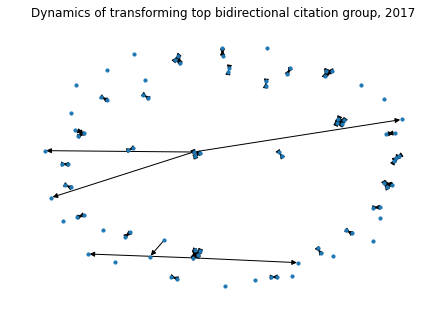

In [298]:
current_year_nodes = get_top_bidiriectional_nodes(get_bidirectional_graph_for_year(2017), n)
nodes_to_show = combine_top_nodes(all_nodes, current_year_nodes)
graph = create_filtered_graph(nodes_to_show)
networkx.draw_spring(graph, edgelist=graph.edges, node_size=10)
all_nodes = nodes_to_show

plt.title("Dynamics of transforming top bidirectional citation group, 2017")

Text(0.5, 1.0, 'Dynamics of transforming top bidirectional citation group, 2018')

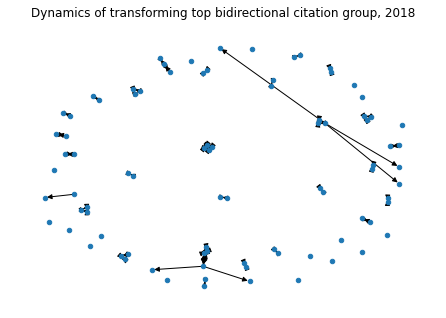

In [294]:
current_year_nodes = get_top_bidiriectional_nodes(get_bidirectional_graph_for_year(2018), n)
nodes_to_show = combine_top_nodes(all_nodes, current_year_nodes)
graph = create_filtered_graph(nodes_to_show)
networkx.draw_spring(graph, edgelist=graph.edges, node_size=20)
all_nodes = nodes_to_show

plt.title("Dynamics of transforming top bidirectional citation group, 2018")